In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '49adb343-6dde-4872-8f69-e0a7d4ac5466',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2024-01-23T19:42:39.728Z', 'error_code': 0, 'error_message': None, 'elapsed': 604, 'credit_count': 25, 'notice': None, 'total_count': 8812}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10782, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [23]:
import pandas as pd


#This allows you to see all the columns, not just 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

id         name  symbol         slug  num_market_pairs  \
0         1      Bitcoin     BTC      bitcoin             10782   
1      1027     Ethereum     ETH     ethereum              8323   
2       825  Tether USDt    USDT       tether             72853   
3      1839          BNB     BNB          bnb              2034   
4      5426       Solana     SOL       solana               618   
...     ...          ...     ...          ...               ...   
4995  21471     StarSlax    SSLX     starslax                 1   
4996   5628         VARC    VARC         varc                 1   
4997  22276    HALO COIN    HALO    halo-coin                 4   
4998  27462  CryptoUnity     CUT  cryptounity                 4   
4999   5578       LEVELG  LEVELG       levelg                 1   

                    date_added  \
0     2010-07-13T00:00:00.000Z   
1     2015-08-07T00:00:00.000Z   
2     2015-02-25T00:00:00.000Z   
3     2017-07-25T00:00:00.000Z   
4     2020-04-10T00:00:00.000Z   
...                        ...   
4995  2022-08-19T09:39:42.000Z   
4996  2020-05-27T00:00:00.000Z   
4997  2022-10-18T08:44:52.000Z   
4998  2023-07-05T23:05:59.000Z   
4999  2020-05-13T00:00:00.000Z   

                                                   tags    max_supply  \
0     [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
1     [pos, smart-contracts, ethereum-ecosystem, coi...           NaN   
2     [payments, stablecoin, asset-backed-stablecoin...           NaN   
3     [marketplace, centralized-exchange, payments, ...           NaN   
4     [pos, platform, solana-ecosystem, cms-holdings...           NaN   
...                                                 ...           ...   
4995                                                 []           NaN   
4996                                                 []  2.500000e+10   
4997                                                 []  7.805831e+09   
4998                                                 []  1.000000e+09   
4999                                                 []  2.100000e+07   

      circulating_supply        total_supply  infinite_supply  platform  \
0           1.960642e+07            19606418            False       NaN   
1           1.201783e+08     120178316.75993             True       NaN   
2           9.492690e+10  98600769245.778763             True       NaN   
3           1.495290e+08    149528953.939811            False       NaN   
4           4.331460e+08    567895733.446486             True       NaN   
...                  ...                 ...              ...       ...   
4995        0.000000e+00         10000000000            False       NaN   
4996        0.000000e+00          2500000000            False       NaN   
4997        0.000000e+00          7805830809            False       NaN   
4998        0.000000e+00          1000000000            False       NaN   
4999        0.000000e+00            20999998            False       NaN   

      cmc_rank  self_reported_circulating_supply  self_reported_market_cap  \
0            1                               NaN                       NaN   
1            2                               NaN                       NaN   
2            3                               NaN                       NaN   
3            4                               NaN                       NaN   
4            5                               NaN                       NaN   
...        ...                               ...                       ...   
4995      4996                      2.446611e+09              1.163039e+07   
4996      4997                               NaN                       NaN   
4997      4998                      4.000000e+09              4.551056e+07   
4998      4999                      4.976000e+08              3.841021e+06   
4999      5000                               NaN                       NaN   

      tvl_ratio              last_updated  quote.USD.price  \
0           NaN  2

In [68]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '49adb343-6dde-4872-8f69-e0a7d4ac5466',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
 # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['Timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df2,df_append])



    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    #df

    #if not os.path.isfile(r'/Users/stephani/Desktop/python scrips/API.csv'):
      # df.to_csv(r'/Users/stephani/Desktop/python scrips/API.csv', header='column_names')
    #else:
        #df.to_csv(r'/Users/stephani/Desktop/python scrips/API.csv', mode='a', header=False)


In [67]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [26]:
df19 = pd.read_csv(r'/Users/stephani/Desktop/python scrips/API.csv')
df19

Unnamed: 0     id         name symbol          slug  num_market_pairs  \
0            0      1      Bitcoin    BTC       bitcoin             10782   
1            1   1027     Ethereum    ETH      ethereum              8323   
2            2    825  Tether USDt   USDT        tether             72856   
3            3   1839          BNB    BNB           bnb              2034   
4            4   5426       Solana    SOL        solana               618   
5            5     52          XRP    XRP           xrp              1215   
6            6   3408         USDC   USDC      usd-coin             16348   
7            7   2010      Cardano    ADA       cardano              1038   
8            8     74     Dogecoin   DOGE      dogecoin               884   
9            9   5805    Avalanche   AVAX     avalanche               645   
10          10   1958         TRON    TRX          tron               911   
11          11   6636     Polkadot    DOT  polkadot-new               672   
12          12   1975    Chainlink   LINK     chainlink              1590   
13          13  11419      Toncoin    TON       toncoin               194   
14          14   3890      Polygon  MATIC       polygon              1256   
15           0      1      Bitcoin    BTC       bitcoin             10782   
16           1   1027     Ethereum    ETH      ethereum              8323   
17           2    825  Tether USDt   USDT        tether             72856   
18           3   1839          BNB    BNB           bnb              2034   
19           4   5426       Solana    SOL        solana               618   
20           5     52          XRP    XRP           xrp              1215   
21           6   3408         USDC   USDC      usd-coin             16348   
22           7   2010      Cardano    ADA       cardano              1038   
23           8     74     Dogecoin   DOGE      dogecoin               884   
24           9   5805    Avalanche   AVAX     avalanche               645   
25          10   1958         TRON    TRX          tron               911   
26          11   6636     Polkadot    DOT  polkadot-new               672   
27          12   1975    Chainlink   LINK     chainlink              1590   
28          13  11419      Toncoin    TON       toncoin               194   
29          14   3890      Polygon  MATIC       polygon              1256   

                  date_added  \
0   2010-07-13T00:00:00.000Z   
1   2015-08-07T00:00:00.000Z   
2   2015-02-25T00:00:00.000Z   
3   2017-07-25T00:00:00.000Z   
4   2020-04-10T00:00:00.000Z   
5   2013-08-04T00:00:00.000Z   
6   2018-10-08T00:00:00.000Z   
7   2017-10-01T00:00:00.000Z   
8   2013-12-15T00:00:00.000Z   
9   2020-07-13T00:00:00.000Z   
10  2017-09-13T00:00:00.000Z   
11  2020-08-19T00:00:00.000Z   
12  2017-09-20T00:00:00.000Z   
13  2021-08-26T13:40:22.000Z   
14  2019-04-28T00:00:00.000Z   
15  2010-07-13T00:00:00.000Z   
16  2015-08-07T00:00:00.000Z   
17  2015-02-25T00:00:00.000Z   
18  2017-07-25T00:00:00.000Z   
19  2020-04-10T00:00:00.000Z   
20  2013-08-04T00:00:00.000Z   
21  2018-10-08T00:00:00.000Z   
22  2017-10-01T00:00:00.000Z   
23  2013-12-15T00:00:00.000Z   
24  2020-07-13T00:00:00.000Z   
25  2017-09-13T00:00:00.000Z   
26  2020-08-19T00:00:00.000Z   
27  2017-09-20T00:00:00.000Z   
28  2021-08-26T13:40:22.000Z   
29  2019-04-28T00:00:00.000Z   

                                                 tags         max_supply  \
0   ['mineable', 'pow', 'sha-256', 'store-of-value...     21000000.00000   
1   ['pos', 'smart-contracts', 'ethereum-ecosystem...                NaN   
2   ['payments', 'stablecoin', 'asset-backed-stabl...                NaN   
3   ['marketplace', 'centralized-exchange', 'payme...                NaN   
4   ['pos', 'platform', 'solana-ecosystem', 'cms-h...                NaN   
5   ['medium-of-exchange', 'enterprise-solutions',... 100000000000.00000   
6   ['medium-of-exchange', 'stablecoin', 'asset-ba...                NaN   
7   ['dpos', 'p

In [14]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [69]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
name                                                                     
Bitcoin                          0.28995                      -2.35332   
Ethereum                         0.38757                      -6.14321   
Tether USDt                      0.00881                      -0.03370   
BNB                             -0.03565                      -4.42937   
Solana                           0.53188                      -4.84854   
XRP                              0.41867                      -3.79440   
USDC                             0.00579                      -0.03966   
Cardano                          0.79713                      -3.93534   
Dogecoin                         0.23510                      -6.39226   
Avalanche                        0.17668                      -4.64332   
TRON                            -0.00675                      -2.75802   
Polkadot                         0.10299                      -3.83588   
Chainlink                        0.05975                      -6.19673   
Toncoin                          0.24679                      -1.98141   
Polygon                          0.33993                      -6.28359   

             quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
name                                                                     
Bitcoin                         -8.80860                      -9.61347   
Ethereum                       -14.82198                      -3.35512   
Tether USDt                     -0.06668                      -0.18463   
BNB                             -6.37854                      10.39033   
Solana                         -15.75640                     -26.87590   
XRP                            -11.57810                     -17.89521   
USDC                             0.01614                      -0.00421   
Cardano                        -13.27667                     -23.35665   
Dogecoin                        -5.35600                     -17.48206   
Avalanche                      -18.41337                     -39.62054   
TRON                            -1.43016                      -0.55200   
Polkadot                       -17.11547                     -29.25336   
Chainlink                       -8.36772                     -10.78502   
Toncoin                        -13.70940                      -4.16564   
Polygon                        -15.94419                     -18.56519   

             quote.USD.percent_change_60d  quote.USD.percent_change_90d  
name                                                                     
Bitcoin                           3.85561                      13.09008  
Ethereum                          5.31214                      22.83063  
Tether USDt                      -0.12598                      -0.11996  
BNB                              26.63666                      32.16966  
Solana                           42.84764                     149.38658  
XRP                             -17.69773                      -8.27248  
USDC                              0.03589                       0.00641  
Cardano                          21.03228                      67.18567  
Dogecoin                         -0.73085                      12.07946  
Avalanche                        38.11907                     177.17484  
TRON                              1.87810                      13.91742  
Polkadot                         19.27107                      44.20013  
Chainlink                        -3.02335                      25.56485  
Toncoin                         -11.60922                      -1.35731  
Polygon                          -6.88702                      12.32929

In [70]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.28995
             quote.USD.percent_change_24h    -2.35332
             quote.USD.percent_change_7d     -8.80860
             quote.USD.percent_change_30d    -9.61347
             quote.USD.percent_change_60d     3.85561
             quote.USD.percent_change_90d    13.09008
Ethereum     quote.USD.percent_change_1h      0.38757
             quote.USD.percent_change_24h    -6.14321
             quote.USD.percent_change_7d    -14.82198
             quote.USD.percent_change_30d    -3.35512
             quote.USD.percent_change_60d     5.31214
             quote.USD.percent_change_90d    22.83063
Tether USDt  quote.USD.percent_change_1h      0.00881
             quote.USD.percent_change_24h    -0.03370
             quote.USD.percent_change_7d     -0.06668
             quote.USD.percent_change_30d    -0.18463
             quote.USD.percent_change_60d    -0.12598
             quote.USD.percent_change_90

In [29]:
type(df4)


pandas.core.series.Series

In [71]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.28995
            quote.USD.percent_change_24h  -2.35332
            quote.USD.percent_change_7d   -8.80860
            quote.USD.percent_change_30d  -9.61347
            quote.USD.percent_change_60d   3.85561
            quote.USD.percent_change_90d  13.09008
Ethereum    quote.USD.percent_change_1h    0.38757
            quote.USD.percent_change_24h  -6.14321
            quote.USD.percent_change_7d  -14.82198
            quote.USD.percent_change_30d  -3.35512
            quote.USD.percent_change_60d   5.31214
            quote.USD.percent_change_90d  22.83063
Tether USDt quote.USD.percent_change_1h    0.00881
            quote.USD.percent_change_24h  -0.03370
            quote.USD.percent_change_7d   -0.06668
            quote.USD.percent_change_30d  -0.18463
            quote.USD.percent_change_60d  -0.12598
            quote.USD.percent_change_90d  -0.11996
BNB         quote.USD.percent_change_1h   -0.03565
            quote.USD.percent_change_24h  -4.42937
            quote.USD.percent_change_7d   -6.37854
            quote.USD.percent_change_30d  10.39033
            quote.USD.percent_change_60d  26.63666
            quote.USD.percent_change_90d  32.16966
Solana      quote.USD.percent_change_1h    0.53188
            quote.USD.percent_change_24h  -4.84854
            quote.USD.percent_change_7d  -15.75640
            quote.USD.percent_change_30d -26.87590
            quote.USD.percent_change_60d  42.84764
            quote.USD.percent_change_90d 149.38658
XRP         quote.USD.percent_change_1h    0.41867
            quote.USD.percent_change_24h  -3.79440
            quote.USD.percent_change_7d  -11.57810
            quote.USD.percent_change_30d -17.89521
            quote.USD.percent_change_60d -17.69773
            quote.USD.percent_change_90d  -8.27248
USDC        quote.USD.percent_change_1h    0.00579
            quote.USD.percent_change_24h  -0.03966
            quote.USD.percent_change_7d    0.01614
            quote.USD.percent_change_30d  -0.00421
            quote.USD.percent_change_60d   0.03589
            quote.USD.percent_change_90d   0.00641
Cardano     quote.USD.percent_change_1h    0.79713
            quote.USD.percent_change_24h  -3.93534
            quote.USD.percent_change_7d  -13.27667
            quote.USD.percent_change_30d -23.35665
            quote.USD.percent_change_60d  21.03228
            quote.USD.percent_change_90d  67.18567
Dogecoin    quote.USD.percent_change_1h    0.23510
            quote.USD.percent_change_24h  -6.39226
            quote.USD.percent_change_7d   -5.35600
            quote.USD.percent_change_30d -17.48206
            quote.USD.percent_change_60d  -0.73085
            quote.USD.percent_change_90d  12.07946
Avalanche   quote.USD.percent_change_1h    0.17668
            quote.USD.percent_change_24h  -4.64332
            quote.USD.percent_change_7d  -18.41337
            quote.USD.percent_change_30d -39.62054
            quote.USD.percent_change_60d  38.11907
            quote.USD.percent_change_90d 177.17484
TRON        quote.USD.percent_change_1h   -0.00675
            quote.USD.percent_change_24h  -2.75802
            quote.USD.percent_change_7d   -1.43016
            quote.USD.percent_change_30d  -0.55200
            quote.USD.percent_change_60d   1.87810
            quote.USD.percent_change_90d  13.91742
Polkadot    quote.USD.percent_change_1h    0.10299
            quote.USD.percent_change_24h  -3.83588
            quote.USD.percent_change_7d  -17.11547
            quote.USD.percent_change_30d -29.25336
            quote.USD.percent_change_60d  19.27107
            quote.USD.percent_change_90d  44.20013
Chainlink   quote.USD.percent_change_1h    0.05975
            quote.USD.percent_change_24h  -6.19673
            quote.USD.percent_change_7d   -8.36772
            quote.USD.percent_change_30d -10.78502
            quote.USD.percent_change_60d  -3.02335
            quo

In [72]:
df5.count()

values    90
dtype: int64

In [73]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6



name                       level_1    values
0       Bitcoin   quote.USD.percent_change_1h   0.28995
1       Bitcoin  quote.USD.percent_change_24h  -2.35332
2       Bitcoin   quote.USD.percent_change_7d  -8.80860
3       Bitcoin  quote.USD.percent_change_30d  -9.61347
4       Bitcoin  quote.USD.percent_change_60d   3.85561
5       Bitcoin  quote.USD.percent_change_90d  13.09008
6      Ethereum   quote.USD.percent_change_1h   0.38757
7      Ethereum  quote.USD.percent_change_24h  -6.14321
8      Ethereum   quote.USD.percent_change_7d -14.82198
9      Ethereum  quote.USD.percent_change_30d  -3.35512
10     Ethereum  quote.USD.percent_change_60d   5.31214
11     Ethereum  quote.USD.percent_change_90d  22.83063
12  Tether USDt   quote.USD.percent_change_1h   0.00881
13  Tether USDt  quote.USD.percent_change_24h  -0.03370
14  Tether USDt   quote.USD.percent_change_7d  -0.06668
15  Tether USDt  quote.USD.percent_change_30d  -0.18463
16  Tether USDt  quote.USD.percent_change_60d  -0.12598
17  Tether USDt  quote.USD.percent_change_90d  -0.11996
18          BNB   quote.USD.percent_change_1h  -0.03565
19          BNB  quote.USD.percent_change_24h  -4.42937
20          BNB   quote.USD.percent_change_7d  -6.37854
21          BNB  quote.USD.percent_change_30d  10.39033
22          BNB  quote.USD.percent_change_60d  26.63666
23          BNB  quote.USD.percent_change_90d  32.16966
24       Solana   quote.USD.percent_change_1h   0.53188
25       Solana  quote.USD.percent_change_24h  -4.84854
26       Solana   quote.USD.percent_change_7d -15.75640
27       Solana  quote.USD.percent_change_30d -26.87590
28       Solana  quote.USD.percent_change_60d  42.84764
29       Solana  quote.USD.percent_change_90d 149.38658
30          XRP   quote.USD.percent_change_1h   0.41867
31          XRP  quote.USD.percent_change_24h  -3.79440
32          XRP   quote.USD.percent_change_7d -11.57810
33          XRP  quote.USD.percent_change_30d -17.89521
34          XRP  quote.USD.percent_change_60d -17.69773
35          XRP  quote.USD.percent_change_90d  -8.27248
36         USDC   quote.USD.percent_change_1h   0.00579
37         USDC  quote.USD.percent_change_24h  -0.03966
38         USDC   quote.USD.percent_change_7d   0.01614
39         USDC  quote.USD.percent_change_30d  -0.00421
40         USDC  quote.USD.percent_change_60d   0.03589
41         USDC  quote.USD.percent_change_90d   0.00641
42      Cardano   quote.USD.percent_change_1h   0.79713
43      Cardano  quote.USD.percent_change_24h  -3.93534
44      Cardano   quote.USD.percent_change_7d -13.27667
45      Cardano  quote.USD.percent_change_30d -23.35665
46      Cardano  quote.USD.percent_change_60d  21.03228
47      Cardano  quote.USD.percent_change_90d  67.18567
48     Dogecoin   quote.USD.percent_change_1h   0.23510
49     Dogecoin  quote.USD.percent_change_24h  -6.39226
50     Dogecoin   quote.USD.percent_change_7d  -5.35600
51     Dogecoin  quote.USD.percent_change_30d -17.48206
52     Dogecoin  quote.USD.percent_change_60d  -0.73085
53     Dogecoin  quote.USD.percent_change_90d  12.07946
54    Avalanche   quote.USD.percent_change_1h   0.17668
55    Avalanche  quote.USD.percent_change_24h  -4.64332
56    Avalanche   quote.USD.percent_change_7d -18.41337
57    Avalanche  quote.USD.percent_change_30d -39.62054
58    Avalanche  quote.USD.percent_change_60d  38.11907
59    Avalanche  quote.USD.percent_change_90d 177.17484
60         TRON   quote.USD.percent_change_1h  -0.00675
61         TRON  quote.USD.percent_change_24h  -2.75802
62         TRON   quote.USD.percent_change_7d  -1.43016
63         TRON  quote.USD.percent_change_30d  -0.55200
64         TRON  quote.USD.percent_change_60d   1.87810
65         TRON  quote.USD.percent_change_90d  13.91742
66     Polkadot   quote.USD.percent_change_1h   0.10299
67     Polkadot  quote.USD.percent_change_24h  -3.83588
68     Polkadot   quote.USD.percent_change_7d -17.11547
69     Polkadot  quote.USD.percent_change_30d -29.25336
70     Polkadot  quote.USD.percent_

In [74]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

name                percent_change    values
0       Bitcoin   quote.USD.percent_change_1h   0.28995
1       Bitcoin  quote.USD.percent_change_24h  -2.35332
2       Bitcoin   quote.USD.percent_change_7d  -8.80860
3       Bitcoin  quote.USD.percent_change_30d  -9.61347
4       Bitcoin  quote.USD.percent_change_60d   3.85561
5       Bitcoin  quote.USD.percent_change_90d  13.09008
6      Ethereum   quote.USD.percent_change_1h   0.38757
7      Ethereum  quote.USD.percent_change_24h  -6.14321
8      Ethereum   quote.USD.percent_change_7d -14.82198
9      Ethereum  quote.USD.percent_change_30d  -3.35512
10     Ethereum  quote.USD.percent_change_60d   5.31214
11     Ethereum  quote.USD.percent_change_90d  22.83063
12  Tether USDt   quote.USD.percent_change_1h   0.00881
13  Tether USDt  quote.USD.percent_change_24h  -0.03370
14  Tether USDt   quote.USD.percent_change_7d  -0.06668
15  Tether USDt  quote.USD.percent_change_30d  -0.18463
16  Tether USDt  quote.USD.percent_change_60d  -0.12598
17  Tether USDt  quote.USD.percent_change_90d  -0.11996
18          BNB   quote.USD.percent_change_1h  -0.03565
19          BNB  quote.USD.percent_change_24h  -4.42937
20          BNB   quote.USD.percent_change_7d  -6.37854
21          BNB  quote.USD.percent_change_30d  10.39033
22          BNB  quote.USD.percent_change_60d  26.63666
23          BNB  quote.USD.percent_change_90d  32.16966
24       Solana   quote.USD.percent_change_1h   0.53188
25       Solana  quote.USD.percent_change_24h  -4.84854
26       Solana   quote.USD.percent_change_7d -15.75640
27       Solana  quote.USD.percent_change_30d -26.87590
28       Solana  quote.USD.percent_change_60d  42.84764
29       Solana  quote.USD.percent_change_90d 149.38658
30          XRP   quote.USD.percent_change_1h   0.41867
31          XRP  quote.USD.percent_change_24h  -3.79440
32          XRP   quote.USD.percent_change_7d -11.57810
33          XRP  quote.USD.percent_change_30d -17.89521
34          XRP  quote.USD.percent_change_60d -17.69773
35          XRP  quote.USD.percent_change_90d  -8.27248
36         USDC   quote.USD.percent_change_1h   0.00579
37         USDC  quote.USD.percent_change_24h  -0.03966
38         USDC   quote.USD.percent_change_7d   0.01614
39         USDC  quote.USD.percent_change_30d  -0.00421
40         USDC  quote.USD.percent_change_60d   0.03589
41         USDC  quote.USD.percent_change_90d   0.00641
42      Cardano   quote.USD.percent_change_1h   0.79713
43      Cardano  quote.USD.percent_change_24h  -3.93534
44      Cardano   quote.USD.percent_change_7d -13.27667
45      Cardano  quote.USD.percent_change_30d -23.35665
46      Cardano  quote.USD.percent_change_60d  21.03228
47      Cardano  quote.USD.percent_change_90d  67.18567
48     Dogecoin   quote.USD.percent_change_1h   0.23510
49     Dogecoin  quote.USD.percent_change_24h  -6.39226
50     Dogecoin   quote.USD.percent_change_7d  -5.35600
51     Dogecoin  quote.USD.percent_change_30d -17.48206
52     Dogecoin  quote.USD.percent_change_60d  -0.73085
53     Dogecoin  quote.USD.percent_change_90d  12.07946
54    Avalanche   quote.USD.percent_change_1h   0.17668
55    Avalanche  quote.USD.percent_change_24h  -4.64332
56    Avalanche   quote.USD.percent_change_7d -18.41337
57    Avalanche  quote.USD.percent_change_30d -39.62054
58    Avalanche  quote.USD.percent_change_60d  38.11907
59    Avalanche  quote.USD.percent_change_90d 177.17484
60         TRON   quote.USD.percent_change_1h  -0.00675
61         TRON  quote.USD.percent_change_24h  -2.75802
62         TRON   quote.USD.percent_change_7d  -1.43016
63         TRON  quote.USD.percent_change_30d  -0.55200
64         TRON  quote.USD.percent_change_60d   1.87810
65         TRON  quote.USD.percent_change_90d  13.91742
66     Polkadot   quote.USD.percent_change_1h   0.10299
67     Polkadot  quote.USD.percent_change_24h  -3.83588
68     Polkadot   quote.USD.percent_change_7d -17.11547
69     Polkadot  quote.USD.percent_change_30d -29.25336
70     Polkadot  quote.USD.percent_

In [75]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

name percent_change    values
0       Bitcoin             1h   0.28995
1       Bitcoin            24h  -2.35332
2       Bitcoin             7d  -8.80860
3       Bitcoin            30d  -9.61347
4       Bitcoin            60d   3.85561
5       Bitcoin            90d  13.09008
6      Ethereum             1h   0.38757
7      Ethereum            24h  -6.14321
8      Ethereum             7d -14.82198
9      Ethereum            30d  -3.35512
10     Ethereum            60d   5.31214
11     Ethereum            90d  22.83063
12  Tether USDt             1h   0.00881
13  Tether USDt            24h  -0.03370
14  Tether USDt             7d  -0.06668
15  Tether USDt            30d  -0.18463
16  Tether USDt            60d  -0.12598
17  Tether USDt            90d  -0.11996
18          BNB             1h  -0.03565
19          BNB            24h  -4.42937
20          BNB             7d  -6.37854
21          BNB            30d  10.39033
22          BNB            60d  26.63666
23          BNB            90d  32.16966
24       Solana             1h   0.53188
25       Solana            24h  -4.84854
26       Solana             7d -15.75640
27       Solana            30d -26.87590
28       Solana            60d  42.84764
29       Solana            90d 149.38658
30          XRP             1h   0.41867
31          XRP            24h  -3.79440
32          XRP             7d -11.57810
33          XRP            30d -17.89521
34          XRP            60d -17.69773
35          XRP            90d  -8.27248
36         USDC             1h   0.00579
37         USDC            24h  -0.03966
38         USDC             7d   0.01614
39         USDC            30d  -0.00421
40         USDC            60d   0.03589
41         USDC            90d   0.00641
42      Cardano             1h   0.79713
43      Cardano            24h  -3.93534
44      Cardano             7d -13.27667
45      Cardano            30d -23.35665
46      Cardano            60d  21.03228
47      Cardano            90d  67.18567
48     Dogecoin             1h   0.23510
49     Dogecoin            24h  -6.39226
50     Dogecoin             7d  -5.35600
51     Dogecoin            30d -17.48206
52     Dogecoin            60d  -0.73085
53     Dogecoin            90d  12.07946
54    Avalanche             1h   0.17668
55    Avalanche            24h  -4.64332
56    Avalanche             7d -18.41337
57    Avalanche            30d -39.62054
58    Avalanche            60d  38.11907
59    Avalanche            90d 177.17484
60         TRON             1h  -0.00675
61         TRON            24h  -2.75802
62         TRON             7d  -1.43016
63         TRON            30d  -0.55200
64         TRON            60d   1.87810
65         TRON            90d  13.91742
66     Polkadot             1h   0.10299
67     Polkadot            24h  -3.83588
68     Polkadot             7d -17.11547
69     Polkadot            30d -29.25336
70     Polkadot            60d  19.27107
71     Polkadot            90d  44.20013
72    Chainlink             1h   0.05975
73    Chainlink            24h  -6.19673
74    Chainlink             7d  -8.36772
75    Chainlink            30d -10.78502
76    Chainlink            60d  -3.02335
77    Chainlink            90d  25.56485
78      Toncoin             1h   0.24679
79      Toncoin            24h  -1.98141
80      Toncoin             7d -13.70940
81      Toncoin            30d  -4.16564
82      Toncoin            60d -11.60922
83      Toncoin            90d  -1.35731
84      Polygon             1h   0.33993
85      Polygon            24h  -6.28359
86      Polygon             7d -15.94419
87      Polygon            30d -18.56519
88      Polygon            60d  -6.88702
89      Polygon            90d  12.32929

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/stephani/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


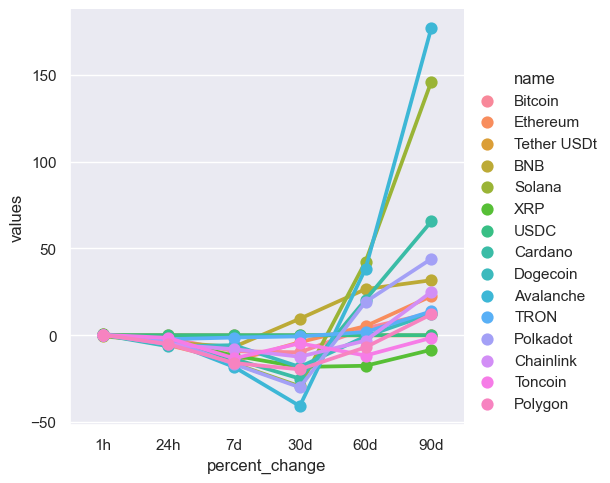

In [54]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [78]:
# Now to do something much simpler
# I am going to create a dataframe with the columns I want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

name  quote.USD.price                  timestamp
0  Bitcoin      39310.47731 2024-01-23 15:52:47.908859

In [ ]:
df